## Introdução

O conjunto de dados escolhido para realização deste projeto foi os dados do acidente com o navio Titanic.
Segundo a descrição, a amostra possui 891 dados demograficos e dos passageiros e tripulação do návio, sendo a população total da viagem de 2224 pessoas.
O nome do arquivo de dados é 'titanic-data.csv'; e a descrição dos seus campos pode ser consultada [aqui](https://www.kaggle.com/c/titanic/data).

__Q1) Uma primeira questão é se a amostra (n=891) é estatisticamente representativa da população (N=2224)?__

A [literatura](https://books.google.com.br/books?id=ElxWPgAACAAJ) apresenta a Equação abaixo para o cálculo do tamanho (n) da amostra para uma população (N) finita, contudo, necessita-se para o cálculo o valor do desvio padrão da população (Sigma) e a margem de erro (E), informações que não está disponível.
Para contornar isto, é recomendado a utilização de um estudo piloto, como pelo menos 31 amostras, utilizando o valor da variãncia obtido para a amostra como parãmetros da população.

$$n= {{N*\sigma^2 * {Z_{(\alpha/2)}}}^2 \over {(N-1)*E^2 + \sigma^2*{Z_{(\alpha/2)}}^2}}$$ 

### O primeiro passo é o carregamento e a limpeza, se necessário, do conjunto de dados.
Este será carregado utilizando uma DataFrame Pandas.

In [48]:
import pandas as pd

dados = pd.read_csv('titanic-data.csv',index_col='PassengerId')

Verificando as primeiras e as últimas linhas do arquivo para ter certeza que o formato está correto.

In [49]:
dados.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [50]:
dados.tail(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Com base na visualização destas primeiras linhas e estudando a descrição dos campos é possível investigar inconsistências ou problemas nos dados, necessitando assim sua limpeza.

Verificando a quantidade de registros lidos, este valor deve ser igual a 891, que foi o valor informado na descrição da base de dados.

In [51]:
len(dados)

891

Conforme saída acima (891), a quantidade de registros está correta. Contudo, é necessário verificar ainda se para alguns dos campos falta alguma informação.

O comando abaixo conta a quantidade de registros para cada um dos campos da base de dados.

In [52]:
dados.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

Conforme saída do comando, os campos: Age (714); Cabin (204); e Embarked (889) possuem alguns registros faltantes, assim, dependendo da influência destas variáveis, isto deverá ser considerado na análise.

O registro "Survived" informa se o passageiro sobrevivel (valor 1) ou não (valor 0). Segundo a [Wikipedia](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic) das 2224 pessoas a bordo, 1514 perderam suas vidas, enquanto 710 foram salvas.
__Q2) Sabendo disto, da população de sobreviventes do naufrágio, qual o tamanho da amostra contida na base de dados 'titanic-data.csv'?__

Para responder a esta pergunta todas as linhas da coluna Survived serão percorridas e contados os números de zeros, variável morto, e os números de um, variável vivo.

In [53]:
dados.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

__R2) Assim, conforme resultados, das 710 vidas (população) salvas no acidente, 342 (amostra) fazem parte da base de dados 'titanic-data.csv.__
Da mesma forma que dos 1514 mortos (população), 549 (amostra) fazem parte da base de dados em questão.</font>

Segundo dados da edição histórica da [Revista Veja](http://veja.abril.com.br/historia/titanic/tragedia-naufragio-iceberg-mortos-causas-investigacao.shtml), "[...]Quando o veteraníssimo capitão britânico Edward Smith percebeu que sua embarcação havia sido comprometida ... ordenou a imediata evacuação do Titanic. ... Os oficiais Murdoch e Lightoller comandaram então a distribuição dos passageiros nos botes, tendo como diretriz a regra internacional de embarcar prioritariamente mulheres e crianças.

__Q3) A base de dados evidencia que a regra internacional de priorizar mulheres e crianças foi seguida?__

Para tentar responder a essa questão serão relacionados os campos "Survived", "Sex" e "Age".
Conforme observado anteriormente, o campo "Age" possui campos faltantes para 105 passageiros (819-714), assim, só serão utilizados nesta análise os dados de 714 passageiros que possuem suas idades registradas.

Inicialmente criou-se um novo dataframa somente com os campos "Survived", "Sex" e "Age"

In [54]:
dados_SSA=dados[['Survived', 'Sex', 'Age']]

Na sequência as linhas que possuirem no campo 'Age' algum dado faltante (NaN) foram desconsideradas

In [55]:
dados_SSA_limpo=dados_SSA.dropna()
len(dados_SSA_limpo)

714

Conforme resultado, com essas operações só restaram os 714 dados completos, sendo que será esse o conjunto de dados utilizado para responder a se as mulheres e crianças foram priorizadas.

In [56]:
dados_SSA_limpo.head(2)

,Survived,Sex,Age
PassengerId,,,
1,0,male,22.0
2,1,female,38.0


Quantidade de sobreviventes na base limpa?

In [57]:
len(dados_SSA_limpo[dados_SSA_limpo.Survived==1])

290

Conforme saída, 290 dos 714 passageiros da lista limpa foram sobreviventes.

Quantas mulheres e homens na base limpa?

In [58]:
dados_SSA_limpo.Sex.value_counts()

male      453
female    261
Name: Sex, dtype: int64

Conforme saída, dos 714 passageiros da lista limpa 261 eram mulheres e 453 homens.

Quantos sobreviventes são mulheres na base limpa?

In [59]:
len (dados_SSA_limpo[(dados_SSA_limpo.Survived==1) & (dados_SSA_limpo.Sex=='female')])

197

Portanto, 197 dos 290 sobreviventes são mulheres.

Com relação a idade: quais os limites, a média, o desvio padrão ... como é o comportamento desta variável (estatística descritiva)?

In [60]:
dados_SSA_limpo.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Assim, a idade dos passageiros variou entre 0,42 anos (5 meses) até 80 anos;sendo a média 29,7 anos e o desvio padrão 14,5 anos.
25% das idades era inferior a 20,1 anos e 75% era inferior a 38 anos.

Como é a distribuição da idade?

Populating the interactive namespace from numpy and matplotlib


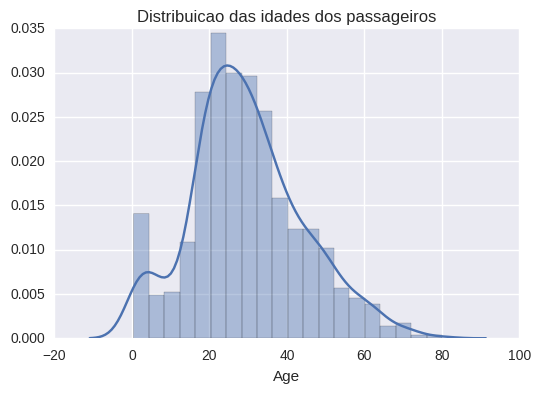

In [61]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.distplot(dados_SSA_limpo.Age)
sns.plt.title('Distribuicao das idades dos passageiros')

Existe idades discrepantes (outliers)?

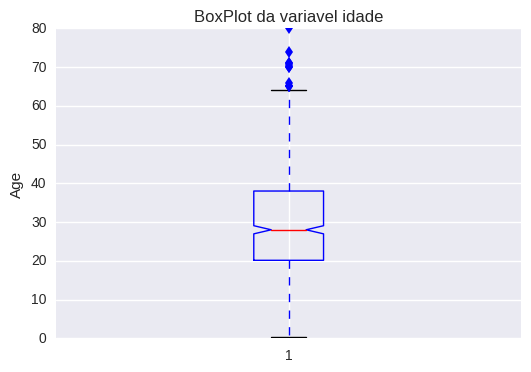

In [62]:
plt.boxplot([dados_SSA_limpo.Age],1,'gd')
plt.ylabel("Age")
plt.title('BoxPlot da variavel idade')

Como pode ser observado nas duas figuras anteriores, foi utilizado o gráfico tipo boxplot para verificar a presença de outliers, que estão presentes para idades maiores que cerca de 65 anos.
Segundo o [livro](https://books.google.com.br/books?id=ElxWPgAACAAJ), para ser considerado um outlier: 

Outlier (superior) > Q3 + 1,5*(Q3-Q1)

In [63]:
Outlier_superior = 38 + 1.5*(38-20.1)

In [64]:
Outlier_superior

64.85

38 + 1,5(38-20,1) = 64,9 anos (existe na amostra)

Outlier (inferior) < Q3 - 1,5*(Q3-Q1) = 38 - 1,5(38-20,1) = 9,7 anos (não existe na amostra)

In [65]:
Outlier_inferior = 38 - 1.5*(38-20.1)

In [66]:
Outlier_inferior

11.150000000000002

Quantas pessoas maiores de 65 anos existem na base e quantas sobreviveram?

In [67]:
len(dados_SSA_limpo[(dados_SSA_limpo.Age >=65)])

11

In [68]:
len (dados_SSA_limpo[(dados_SSA_limpo.Survived==1) & (dados_SSA_limpo.Age >=65)])

1

Das 11 pessoas maiores de 65 anos, somente uma sobreviveu.
Qual seria o gênero destas pessoas?

In [69]:
dados_SSA_limpo[(dados_SSA_limpo.Sex=='male') & (dados_SSA_limpo.Age >=65)]

,Survived,Sex,Age
PassengerId,,,
34,0,male,66.0
55,0,male,65.0
97,0,male,71.0
117,0,male,70.5
281,0,male,65.0
457,0,male,65.0
494,0,male,71.0
631,1,male,80.0
673,0,male,70.0


Todos eram homens.

Conforme citado acima, existe uma regra internacional de embarcar prioritariamente mulheres e crianças. Na base de dados disponível trás a idade, mas surge a pergunta: Qual a idade para ser considerado criança?

Apesar da grande divergência entre os especialistas quanto aos critérios de agrupamento etário, baseado nas duas fonte abaixo, foi estabelecido o seguinte critério neste trabalho: criança  <= 11 anos; 18 > adolescente >= 12 anos; 60 >= adulto  >= 19 anos; idoso > 60 anos.
Fonte: [Portal Educação](https://www.portaleducacao.com.br/enfermagem/artigos/30165/vida-adulta) e [INSA](http://www.insa.gov.br/censosab/?option=com_content&view=article&id=101&Itemid=100)

Assim, o próximo passo foi classificar segundo o critério adotado cada um dos passageiros da base limpa.

In [70]:
def agrupa (idade):
    """ Realiza classificação etária dos passageiros
    Classifica os passageiros conforme suas idades em: Idoso, Adulto, Adolescente ou Criança.
    Critério: criança <= 11 anos; 18 > adolescente >= 12 anos; 60 >= adulto >= 19 anos; idoso > 60 anos
    
    Argumentos:
            Recebe uma idade            
    Retornos:
            Retorna a idade classificada conforme critério adotado.   
    """
    if idade > 60.0:
        return 'Idoso'
    elif idade >= 19.0:
        return 'Adulto'
    elif idade >= 12.0:
        return 'Adolescente'
    else:
        return 'Crianca'

In [71]:
AgrupEtar=dados_SSA_limpo.apply(lambda row: agrupa(row['Age']), axis=1)

In [72]:
df_Agrupa=pd.DataFrame(AgrupEtar, columns=['AgrupEtar'])

In [73]:
dados_SSA_limpo_2=pd.concat([dados_SSA_limpo, df_Agrupa],axis=1)
dados_SSA_limpo_2.head(2)

,Survived,Sex,Age,AgrupEtar
PassengerId,,,,
1,0,male,22.0,Adulto
2,1,female,38.0,Adulto


Como seria um gráfico de barras e o respectivos valores encontrados para cada um dos agrupamentos?

In [74]:
dados_SSA_limpo_2.AgrupEtar.value_counts()

Adulto         553
Adolescente     71
Crianca         68
Idoso           22
Name: AgrupEtar, dtype: int64

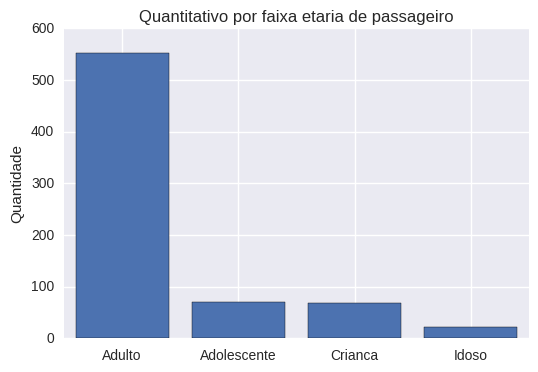

In [75]:
Y= pd.np.array(dados_SSA_limpo_2.AgrupEtar.value_counts())
X=[0,1,2,3]
LABELS=['Adulto', 'Adolescente', 'Crianca', 'Idoso']
plt.bar(X,Y,align='center')
plt.xticks(X, LABELS)
plt.ylabel("Quantidade")
plt.title('Quantitativo por faixa etaria de passageiro')

Conforme saída acima, na base há: 553 adultos, 71 adolescentes, 68 crianças e 22 idosos

Quantas mulheres ou crianças sobreviveram?

In [76]:
len (dados_SSA_limpo_2[(dados_SSA_limpo_2.Survived==1) &
                       ((dados_SSA_limpo_2.Sex=='female') |
                       (dados_SSA_limpo_2.AgrupEtar=='Crianca'))])

217

__R3) Portanto, dos 714 passageiros da base de dados, 290 sobreviveram, sendo que destes 217 eram mulheres ou crianças; isto é, cerca de 75% dos sobreviventes eram mulheres ou crianças. Assim, parece que a norma internacional de priorização de mulheres e crianças foi atendida.__

Quantas mulheres ou crianças morreram?

In [77]:
len(dados_SSA_limpo_2[(dados_SSA_limpo_2.Survived==0) &
                       ((dados_SSA_limpo_2.Sex=='female') |
                       (dados_SSA_limpo_2.AgrupEtar=='Crianca'))])

80

Portanto, dos 714 passageiros da base de dados, 424 morreram, sendo que destes 80 eram mulheres ou crianças; isto é, cerca de 18,9% dos mortos eram mulheres ou crianças.

__Q4)  Qual a classe de viagens das mulheres ou crianças mortos?__

In [78]:
I_MC_mortos=dados_SSA_limpo_2[(dados_SSA_limpo_2.Survived==0) &
                       ((dados_SSA_limpo_2.Sex=='female') |
                       (dados_SSA_limpo_2.AgrupEtar=='Crianca'))].index

In [79]:
Classe=dados.iloc[I_MC_mortos-1]

Está faltando algum dado no campo Pclass desta sub-base? Devem existir 80 dados.

In [80]:
Classe.Pclass.count()

80

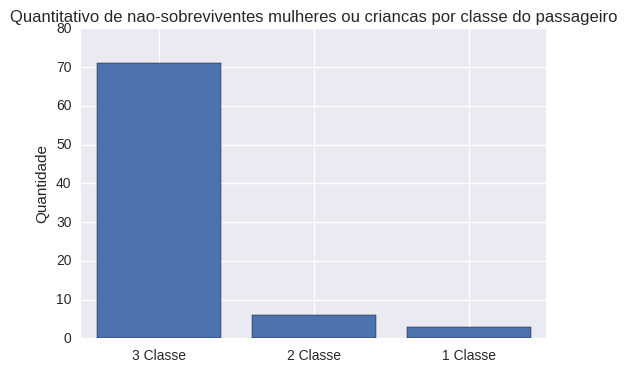

In [81]:
Y=pd.np.array(Classe.Pclass.value_counts())
X=[0,1,2]
LABELS=['3 Classe', '2 Classe', '1 Classe']
plt.bar(X,Y,align='center')
plt.xticks(X, LABELS)
plt.ylabel("Quantidade")
plt.title('Quantitativo de nao-sobreviventes mulheres ou criancas por classe do passageiro')

__R4) Das 80 mulheres ou crianças que morreram, 71 erram da 3ª Classe, isto corresponde a 88,8% dos mortos nesta categória.__

Salvo existisse alguma dificuldade de locomoção com os passageiros da 3ª classse - devido, por exemplo, a localização física das acomodações desta categória, esse achado ( 88.8% de mulheres ou crianças mortos eram da 3ª classe) mostra que pode ter existido critérios econômicos para a escolha de quem salvar.

__Q5) Qual a categória das 217 mulheres ou crianças que se salvaram?__

In [82]:
I_MC_vivos=dados_SSA_limpo_2[(dados_SSA_limpo_2.Survived==1) &
                       ((dados_SSA_limpo_2.Sex=='female') |
                       (dados_SSA_limpo_2.AgrupEtar=='Crianca'))].index

In [83]:
Classe_v=dados.iloc[I_MC_vivos-1]

In [84]:
Classe_v.Pclass.count()

217

In [85]:
Classe_v.Pclass.value_counts()

1    85
2    77
3    55
Name: Pclass, dtype: int64

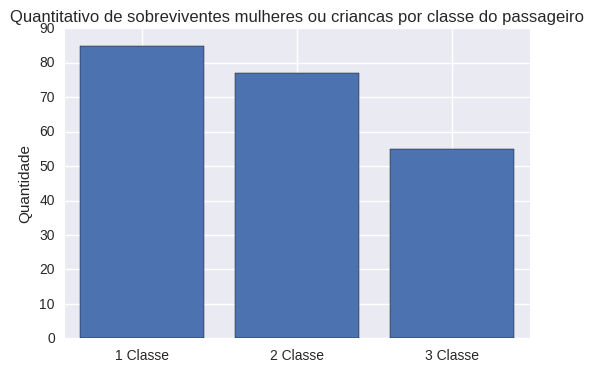

In [86]:
Y=pd.np.array(Classe_v.Pclass.value_counts())
X=[0,1,2]
LABELS=['1 Classe', '2 Classe', '3 Classe']
plt.bar(X,Y,align='center')
plt.xticks(X, LABELS)
plt.ylabel("Quantidade")
plt.title('Quantitativo de sobreviventes mulheres ou criancas por classe do passageiro')

__R5) Conforme ilustrado na gráfico de barras acima, realmente mulheres e crianças da 1ª classe foram as que mais de salvaram (39,2%), seguidos pela 2ª Classe (35,5%); juntas, elas essas duas classes representaram cerca de 75% dos salvos. Já a 3ª Classe obteve o menor percentual de salvos (25,3%).__

__Q6)Agora, independente da idade e do sexo, como foi o comportamento entre número de mortos em função da classe da viagem?__

In [87]:
SP_mortos=pd.concat([dados['Survived'], dados['Pclass']],axis=1)

In [88]:
mortos_1C=len(SP_mortos[(SP_mortos.Survived==0) & (SP_mortos.Pclass==1)])
mortos_2C=len(SP_mortos[(SP_mortos.Survived==0) & (SP_mortos.Pclass==2)])
mortos_3C=len(SP_mortos[(SP_mortos.Survived==0) & (SP_mortos.Pclass==3)])

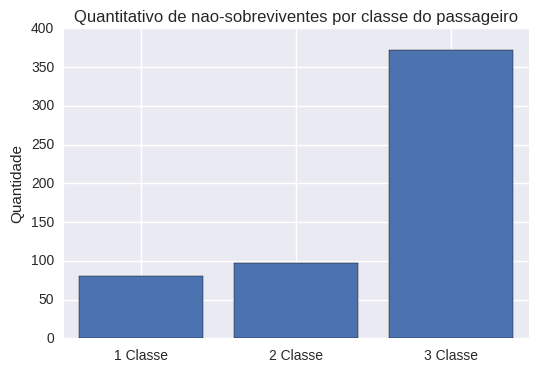

In [89]:
Y1=[mortos_1C, mortos_2C, mortos_3C]
X1=[1,2,3]
LABELS=['1 Classe', '2 Classe', '3 Classe']
plt.bar(X1,Y1,  align='center')
plt.xticks(X1, LABELS)
plt.ylabel('Quantidade')
plt.title('Quantitativo de nao-sobreviventes por classe do passageiro')

In [90]:
Y1

[80, 97, 372]

__R6) Portanto, dos 549 mortos na tragédia - registrados na base de dados -, 14,6% eram da 1ª classe, 17,7% da 2ª classe e 67,7% da 3ª classe.__

Voltando a Questão 1: como responde-la considerando a variável idade?

Dados:
- Variável: idade;
- Variância da População: Será considerado a variãncia da amostra
- Grau de confiança: 95% -> Z=1,96 (adotado)
- Margem de erro: 3% (adotado)
- População: 2224

In [91]:
n=(2224*14.526497**2*1.96**2)/(2224-1*(0.03*29.699118)**2+ 14.526497**2*1.96**2)

In [92]:
n

594.2560174343182

__R1) Portanto, como o número de amostras da base de dados para a variável idade (714) é maior que a calculada (594), a amostra tem representatividade estatistica da população com grau de confiança de 95% e margem de erro de 3%.__

**Conclusões**

Conforme achados, as __variáves que mais parecem influenciar a sobrevivenvia__ neste acidente foram: __ser mulher__, __ser criança__ ou __ser passageiro da 1ª classe__. Os dados utilizados são representativos da amostra; conforme calculado para a variável idade, tem-se um grau de confiança de 95% e margem de erro de 3%.
Contudo, podem existir ainda variáveis ocultas, tais como a localização física dos passageiros, que podem influenciar sobremaneira sua retirada do navio e consequentemente sua sobrevivencia.
Notou-se também grande correlação entre as variáveis sobrevivência e classe da viagem, contudo, sem a realização de um experímento, não se pode afirmar a existencia de causalidade entre essas variáveis.
Como recomendação de trabalhos futuros, caberia a utilização de testes de hipóteses com a estatística t (uma vez que os parâmetros da população não são conhecidos) para aceitar ou refutar a hipótese de que a média de mortos de mulheres ou crianças da 3ª classe foi maior que a da 1ª classe; e ainda a utilização de um modelo neural, com 3 entradas (idade, classe e sexo) e uma saída (sobrevivência) de forma atentar predizer a sobrevivência de um passageiro; por fim, o estudo da influência de outras variáveis ou mesmo suas correlações é recomendado.



